In [1]:
import pandas as pd 
df=pd.read_csv("../raw/fake_job_postings.csv")

In [2]:
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [3]:
print("real : ",(df["fraudulent"].value_counts()[0]/(df["fraudulent"].value_counts()[0]+df["fraudulent"].value_counts()[1]))*100)
print("fake :",(df["fraudulent"].value_counts()[1]/(df["fraudulent"].value_counts()[0]+df["fraudulent"].value_counts()[1]))*100)


real :  95.1565995525727
fake : 4.8434004474272925


In [4]:
(df.isna().sum()/df.shape[0])*100

job_id                  0.000000
title                   0.000000
location                1.935123
department             64.580537
salary_range           83.959732
company_profile        18.501119
description             0.005593
requirements           15.078300
benefits               40.335570
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        19.412752
required_experience    39.429530
required_education     45.329978
industry               27.421700
function               36.101790
fraudulent              0.000000
dtype: float64

### as we see the salary column has the biggest percentage of missing value and this is very common in real job posting 
### most companies don't publicly share salary ranges 
### this is useful feature 'cause fake jobs maybe more likely to mention salary



In [5]:

fake_jobs=df[df["fraudulent"]==1]
real_jobs=df[df["fraudulent"]==0]

for col in df.columns:
    if df[col].isna().sum() != 0 :
        print(f"real jobs {col} missing:{real_jobs[col].isna().mean()*100:.2f} %")
        print(f"fake jobs {col} missing: {fake_jobs[col].isna().mean()*100:.2f} %")
        print("=="*20)
        

real jobs location missing:1.92 %
fake jobs location missing: 2.19 %
real jobs department missing:64.75 %
fake jobs department missing: 61.32 %
real jobs salary_range missing:84.45 %
fake jobs salary_range missing: 74.25 %
real jobs company_profile missing:15.99 %
fake jobs company_profile missing: 67.78 %
real jobs description missing:0.00 %
fake jobs description missing: 0.12 %
real jobs requirements missing:14.94 %
fake jobs requirements missing: 17.78 %
real jobs benefits missing:40.25 %
fake jobs benefits missing: 42.03 %
real jobs employment_type missing:18.98 %
fake jobs employment_type missing: 27.83 %
real jobs required_experience missing:38.88 %
fake jobs required_experience missing: 50.23 %
real jobs required_education missing:44.99 %
fake jobs required_education missing: 52.08 %
real jobs industry missing:27.20 %
fake jobs industry missing: 31.76 %
real jobs function missing:35.96 %
fake jobs function missing: 38.91 %


In [6]:
import math

for col in df.columns.tolist():
    if math.fabs( (real_jobs[col].isna().mean()*100)-(fake_jobs[col].isna().mean()*100))>=3 and not col.startswith('has_'):
        column_name="has_"+col
        if column_name not in df.columns.tolist(): 
            df["has_"+col]=df[col].notna().astype(int)
        

1. handling the missing values 
2. NLP for the text columns

In [7]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,industry,function,fraudulent,has_department,has_salary_range,has_company_profile,has_employment_type,has_required_experience,has_required_education,has_industry
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,...,NaN,Marketing,0,1,0,1,1,1,0,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,...,Marketing and Advertising,Customer Service,0,1,0,1,1,1,0,1
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,...,NaN,NaN,0,0,0,1,0,0,0,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,...,Computer Software,Sales,0,1,0,1,1,1,1,1
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,...,Hospital & Health Care,Health Care Provider,0,0,0,1,1,1,1,1


In [8]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent', 'has_department', 'has_salary_range',
       'has_company_profile', 'has_employment_type', 'has_required_experience',
       'has_required_education', 'has_industry'],
      dtype='object')

In [9]:
for col in df.columns :
    if not col.startswith("has_") and col not in ["fraudulent","telecommuting","salary_range"]:
        df[col].fillna("unknown")
df["salary_range"]=df["salary_range"].fillna("unspecified")

In [10]:
df.isna().sum().sum()

np.int64(55094)

In [11]:
import re
def extract_salary(salary):
    if salary == "unspecified" or "-" not in str(salary) :
        return 0,0
    try:
       partes=str(salary).split("-")
       low = re.sub(r'\D',"",partes[0])
       high = re.sub(r'\D',"",partes[1])
       return int(low),int(high)
    except :
        return 0,0


df["min_salary"],df["max_salary"]=zip(*df["salary_range"].apply(extract_salary))

In [12]:
df["department"].nunique()

1337

In [13]:
# dropping high unique values columns  
df=df.drop(columns=["location","department","salary_range"])

In [14]:
cols=["required_experience","required_education","function","industry","employment_type"]
df[cols]=df[cols].fillna(df[cols].mode().iloc[0])


# Preprocessing


### these are columns that has an order so they should be encoded with OrdinalEncoder

In [15]:
print(df["required_experience"].value_counts().index.tolist())
print(df["required_education"].value_counts().index.tolist())

['Mid-Senior level', 'Entry level', 'Associate', 'Not Applicable', 'Director', 'Internship', 'Executive']
["Bachelor's Degree", 'High School or equivalent', 'Unspecified', "Master's Degree", 'Associate Degree', 'Certification', 'Some College Coursework Completed', 'Professional', 'Vocational', 'Some High School Coursework', 'Doctorate', 'Vocational - HS Diploma', 'Vocational - Degree']


### these columns has low nomber of unique values so the best encoding approach is OneHotEncoder  

In [16]:
print(df["function"].nunique())
print(df["industry"].nunique())
print(df["employment_type"].nunique())

37
131
5


In [17]:
ordinal_cols=["required_experience","required_education"]
req_exp_order=[
    "Not Applicable",      
    "Internship",          
    "Entry level",         
    "Associate",           
    "Mid-Senior level",    
    "Director",            
    "Executive"            
]
req_edu_order=[
    "Bachelor's Degree",
 'High School or equivalent',
 'Unspecified',
 "Master's Degree",
 'Associate Degree',
 'Certification',
 'Some College Coursework Completed',
 'Professional',
 'Vocational',
 'Some High School Coursework',
 'Doctorate',
 'Vocational - HS Diploma',
 'Vocational - Degree'
]

cat_cals=["function","industry","employment_type"]

In [18]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
preprocessor=ColumnTransformer( transformers=[
       ("ohe",OneHotEncoder(sparse_output=False,handle_unknown="ignore"),cat_cals),
        ("ord",OrdinalEncoder(categories=[req_exp_order,req_edu_order]),ordinal_cols)
], remainder="passthrough"
)
encoded=preprocessor.fit_transform(df[["function","industry","employment_type"]+["required_experience","required_education"]])

ohe_feature_names=preprocessor.named_transformers_['ohe'].get_feature_names_out(cat_cals)
encoded_df=pd.DataFrame(
    encoded,
    columns=list(ohe_feature_names)+ordinal_cols
)
df=df.drop(columns=cat_cals+ordinal_cols,errors='ignore')
df=pd.concat([df,encoded_df],axis=1)

### saving the preprocessor

In [19]:
import pickle
fp=open("../../models/preprocessor.pkl","wb")
pickle.dump(preprocessor,fp)

In [20]:
text_columns=["title","company_profile","requirements","benefits","description"]
df[text_columns].isna().sum()


title                 0
company_profile    3308
requirements       2696
benefits           7212
description           1
dtype: int64

In [21]:
df[text_columns].isna().sum()

title                 0
company_profile    3308
requirements       2696
benefits           7212
description           1
dtype: int64

In [22]:
df["job_text"] = df[text_columns].fillna("").astype(str).agg(" ".join, axis=1)

df["job_text"] = df["job_text"].str.lower().str.strip()


In [23]:
df[["job_text", "fraudulent"]].head(3)

,job_text,fraudulent
0,"marketing intern we're food52, and we've creat...",0
1,customer service - cloud video production 90 s...,0
2,commissioning machinery assistant (cma) valor ...,0


In [24]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
# nltk.download('stopwords')
stop_words = set(stopwords.words("english"))
lemmatizer=WordNetLemmatizer()

def lemmatize_text(text):
    words=nltk.word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word.isalpha() and word not in stop_words]
    return " ".join(words)
    
df["job_text"]=df["job_text"].apply(lemmatize_text)

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(ngram_range=(1, 2))
x=vectorizer.fit_transform(df["job_text"])

import pickle

with open("../../models/lemmatizer.pkl", "wb") as f:
    pickle.dump(lemmatizer, f)

with open("../../models/stopwords.pkl", "wb") as f:
    pickle.dump(stop_words, f)

with open("../../models/vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)


In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[["min_salary","max_salary"]]=scaler.fit_transform(df[["min_salary","max_salary"]])

with open("../../models/scaler.pkl","wb") as fp:
    pickle.dump(scaler,fp)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
# dropping "min_salary","max_salary" because of feature dominance 
unwanted_colls=["title","company_profile","description","requirements","benefits","job_text","job_id","fraudulent","min_salary","max_salary"]
from scipy.sparse import hstack
X_combined=hstack([x,df.drop(columns=unwanted_colls).values])
y=df["fraudulent"]
xtrain,xtest,ytrain,ytest=train_test_split(X_combined,y,test_size=0.2,random_state=42)

knn_model=KNeighborsClassifier(n_neighbors=7)
knn_model.fit(xtrain,ytrain)


,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",7
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [28]:
print(classification_report(ytest,knn_model.predict(xtest)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3395
           1       0.81      0.65      0.72       181

    accuracy                           0.97      3576
   macro avg       0.89      0.82      0.85      3576
weighted avg       0.97      0.97      0.97      3576



* ### The KNN algorithm is weak when dealing with imbalanced data in our case, despite achieving high accuracy.

* ### In our dataset, we have imbalanced data: 95% belong to class 0 and only 5% belong to class 1. Therefore, in most cases, the model  predicts class 0 because the majority of its neighbors belong to class 0.

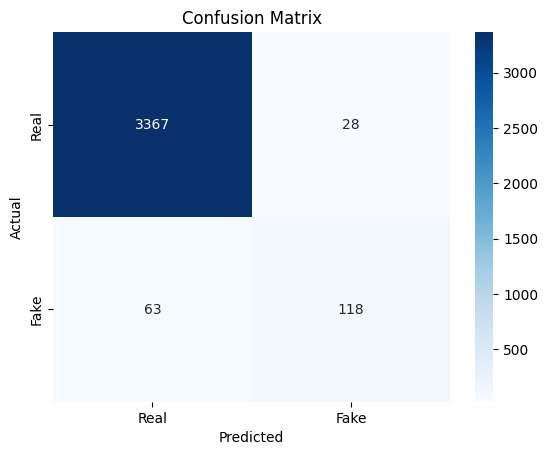

In [29]:
ypredict=knn_model.predict(xtest)

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(ytest, ypredict)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real','Fake'], yticklabels=['Real','Fake'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [30]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=1,class_weight='balanced')
svc.fit(xtrain,ytrain)

C:\Users\ABDELHAKELK\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1258: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,"penalty penalty: {'l1', 'l2'}, default='l2'Specifies the norm used in the penalization. The 'l2'penalty is the standard used in SVC. The 'l1' leads to ``coef_``vectors that are sparse.",'l2'
,"loss loss: {'hinge', 'squared_hinge'}, default='squared_hinge'Specifies the loss function. 'hinge' is the standard SVM loss(used e.g. by the SVC class) while 'squared_hinge' is thesquare of the hinge loss. The combination of ``penalty='l1'``and ``loss='hinge'`` is not supported.",'squared_hinge'
,"dual dual: ""auto"" or bool, default=""auto""Select the algorithm to either solve the dual or primaloptimization problem. Prefer dual=False when n_samples > n_features.`dual=""auto""` will choose the value of the parameter automatically,based on the values of `n_samples`, `n_features`, `loss`, `multi_class`and `penalty`. If `n_samples` < `n_features` and optimizer supportschosen `loss`, `multi_class` and `penalty`, then dual will be set to True,otherwise it will be set to False... versionchanged:: 1.3 The `""auto""` option is added in version 1.3 and will be the default in version 1.5.",'auto'
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive.For an intuitive visualization of the effects of scalingthe regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1
,"multi_class multi_class: {'ovr', 'crammer_singer'}, default='ovr'Determines the multi-class strategy if `y` contains more thantwo classes.``""ovr""`` trains n_classes one-vs-rest classifiers, while``""crammer_singer""`` optimizes a joint objective over all classes.While `crammer_singer` is interesting from a theoretical perspectiveas it is consistent, it is seldom used in practice as it rarely leadsto better accuracy and is more expensive to compute.If ``""crammer_singer""`` is chosen, the options loss, penalty and dualwill be ignored.",'ovr'
,"fit_intercept fit_intercept: bool, default=TrueWhether or not to fit an intercept. If set to True, the feature vectoris extended to include an intercept term: `[x_1, ..., x_n, 1]`, where1 corresponds to the intercept. If set to False, no intercept will beused in calculations (i.e. data is expected to be already centered).",True
,"intercept_scaling intercept_scaling: float, default=1.0When `fit_intercept` is True, the instance vector x becomes ``[x_1,..., x_n, intercept_scaling]``, i.e. a ""synthetic"" feature with aconstant value equal to `intercept_scaling` is appended to the instancevector. The intercept becomes intercept_scaling * synthetic featureweight. Note that liblinear internally penalizes the intercept,treating it like any other term in the feature vector. To reduce theimpact of the regularization on the intercept, the `intercept_scaling`parameter can be set to a value greater than 1; the higher the value of`intercept_scaling`, the lower the impact of regularization on it.Then, the weights become `[w_x_1, ..., w_x_n,w_intercept*intercept_scaling]`, where `w_x_1, ..., w_x_n` representthe feature weights and the intercept weight is scaled by`intercept_scaling`. This scaling allows the intercept term to have adifferent regularization behavior compared to the other features.",1
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to ``class_weight[i]*C`` forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",'balanced'
,"verbose verbose: int, default=0Enable verbose output. Note that this setting takes advantage of aper-process runtime setting in liblinear that, if enabled, may not workproperly in a multithreaded context.",0
,"random_state random_state: int, RandomState instance or None, default=NoneControls the pseudo 

In [31]:
print(classification_report(ytest,svc.predict(xtest)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3395
           1       0.97      0.83      0.89       181

    accuracy                           0.99      3576
   macro avg       0.98      0.91      0.94      3576
weighted avg       0.99      0.99      0.99      3576



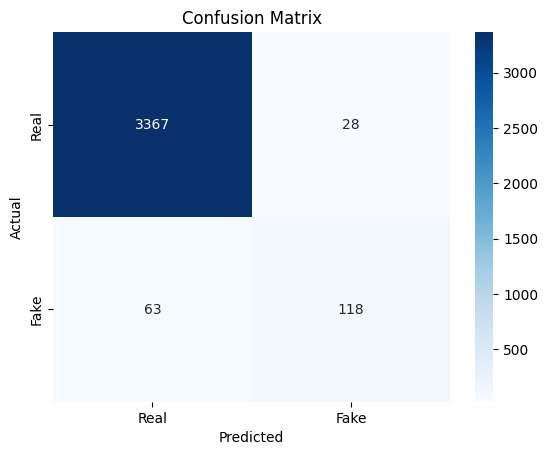

In [32]:

cm = confusion_matrix(ytest, ypredict)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real','Fake'], yticklabels=['Real','Fake'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [33]:
import pickle
fp = open('../../models/knn_model.pkl','wb')
pickle.dump(knn_model,fp)
fp=open('../../models/svc.pkl','wb')
pickle.dump(svc,fp)

In [34]:
df.to_csv('../raw/processed.csv')

In [35]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    max_iter=2000,
    class_weight="balanced"
)
log_reg.fit(xtrain,ytrain)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :ter

In [36]:
print(classification_report(ytest,log_reg.predict(xtest)))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      3395
           1       0.55      0.90      0.68       181

    accuracy                           0.96      3576
   macro avg       0.77      0.93      0.83      3576
weighted avg       0.97      0.96      0.96      3576



In [39]:
with open('../../models/log_reg.pkl','wb') as fp:
    pickle.dump(log_reg,fp)

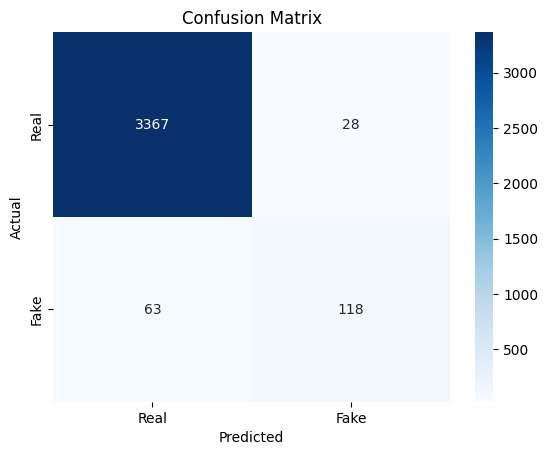

In [41]:
cm = confusion_matrix(ytest, ypredict)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real','Fake'], yticklabels=['Real','Fake'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()